# Gather

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

In [74]:
customersegm = pd.read_csv('customersegm.csv', encoding='cp1252')

# Assess

In [4]:
customersegm

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [5]:
customersegm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
list(customersegm)

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [7]:
customersegm.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [8]:
customersegm.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
customersegm.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
582,10162,29,100.00,9,5176.50,10/18/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
1818,10419,15,42.67,7,640.05,5/17/2005 0:00,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Small
1764,10351,25,74.68,5,1867.00,12/3/2004 0:00,Shipped,4,12,2004,...,35 King George,NaN,London,NaN,WX3 6FW,UK,EMEA,Brown,Ann,Small
878,10379,29,100.00,5,5127.20,2/10/2005 0:00,Shipped,1,2,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2638,10382,34,54.84,9,1864.56,2/17/2005 0:00,Shipped,1,2,2005,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Small


In [10]:
customersegm.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Clean

In [11]:
customersegm_clean=customersegm.copy()

In [12]:
customersegm_clean.columns= customersegm_clean.columns.str.lower()
customersegm_clean.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

# Missing Data

In [13]:
#Recalculatet salese column by multiplying quantityordered by priceeach
customersegm_clean.sales = (customersegm_clean.quantityordered * customersegm_clean.priceeach)

In [14]:
customersegm_clean.sales.head()

0    2871.00
1    2765.90
2    3884.34
3    3746.70
4    4900.00
Name: sales, dtype: float64

In [72]:
customersegm_clean= customersegm_clean.rename(columns={'priceeach': 'price'})


AttributeError: 'NoneType' object has no attribute 'rename'

In [16]:
customersegm_clean.isnull().sum()

ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

In [17]:
#we drop ADDRESSLINE2 because that has a 2521 NANvalue from 2822 and the data in other rows incorrect
customersegm_clean = customersegm_clean.drop('addressline2' , axis=1)

In [18]:
list(customersegm_clean)

['ordernumber',
 'quantityordered',
 'priceeach',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'qtr_id',
 'month_id',
 'year_id',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'city',
 'state',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize']

In [19]:
customersegm_clean.state=customersegm_clean.state.fillna('-')

In [20]:
customersegm_clean.territory=customersegm_clean.territory.fillna('')

In [21]:
customersegm_clean.isnull().sum()

ordernumber          0
quantityordered      0
priceeach            0
orderlinenumber      0
sales                0
orderdate            0
status               0
qtr_id               0
month_id             0
year_id              0
productline          0
msrp                 0
productcode          0
customername         0
phone                0
addressline1         0
city                 0
state                0
postalcode          76
country              0
territory            0
contactlastname      0
contactfirstname     0
dealsize             0
dtype: int64

In [22]:
customersegm_clean['qurater'] = "Q"+customersegm_clean['qtr_id'].astype(str)
customersegm_clean.drop(columns=['month_id', 'year_id', 'qtr_id'], inplace=True)
customersegm_clean['qurater']
# inplace=True, pandas modifies the original DataFrame directly, and there is no need to assign the result to a new variable.

0       Q1
1       Q2
2       Q3
3       Q3
4       Q4
        ..
2818    Q4
2819    Q1
2820    Q1
2821    Q1
2822    Q2
Name: qurater, Length: 2823, dtype: object

In [23]:
customersegm_clean.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,productline,msrp,productcode,...,addressline1,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,qurater
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,897 Long Airport Avenue,NYC,NY,10022,USA,,Yu,Kwai,Small,Q1
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,59 rue de l'Abbaye,Reims,-,51100,France,EMEA,Henriot,Paul,Small,Q2
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,27 rue du Colonel Pierre Avia,Paris,-,75508,France,EMEA,Da Cunha,Daniel,Medium,Q3
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,78934 Hillside Dr.,Pasadena,CA,90003,USA,,Young,Julie,Medium,Q3
4,10159,49,100.00,14,4900.00,10/10/2003 0:00,Shipped,Motorcycles,95,S10_1678,...,7734 Strong St.,San Francisco,CA,NaN,USA,,Brown,Julie,Medium,Q4


# Quality

In [24]:
customersegm_clean.orderdate

0        2/24/2003 0:00
1         5/7/2003 0:00
2         7/1/2003 0:00
3        8/25/2003 0:00
4       10/10/2003 0:00
             ...       
2818     12/2/2004 0:00
2819     1/31/2005 0:00
2820      3/1/2005 0:00
2821     3/28/2005 0:00
2822      5/6/2005 0:00
Name: orderdate, Length: 2823, dtype: object

In [25]:
#convert orderdate from object to datetime
customersegm_clean.orderdate = pd.to_datetime(customersegm_clean.orderdate)

In [26]:
customersegm_clean.orderdate.head()

0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: orderdate, dtype: datetime64[ns]

In [27]:
customersegm_clean.productcode

0       S10_1678
1       S10_1678
2       S10_1678
3       S10_1678
4       S10_1678
          ...   
2818    S72_3212
2819    S72_3212
2820    S72_3212
2821    S72_3212
2822    S72_3212
Name: productcode, Length: 2823, dtype: object

In [28]:
#strip S and remove _
customersegm_clean.productcode = customersegm_clean.productcode.str.strip('S').astype(str).str.replace('_','')

In [29]:
customersegm_clean.productcode.sample(5)

982     183136
1369    184721
2162    321268
1950    243816
2298    323522
Name: productcode, dtype: object

In [30]:
customersegm_clean.phone

0             2125557818
1             26.47.1555
2       +33 1 46 62 7555
3             6265557265
4             6505551386
              ...       
2818      (91) 555 94 44
2819          981-443655
2820      (91) 555 94 44
2821          61.77.6555
2822          6175559555
Name: phone, Length: 2823, dtype: object

In [31]:
#phone number strip "() .+- "
customersegm_clean['Phonenumber'] = customersegm_clean.phone
# use RegeX Expression
customersegm_clean.Phonenumber= customersegm_clean.Phonenumber.str.replace(r'\D+', '', regex=True)
customersegm_clean = customersegm_clean.drop('phone' , axis=1)

In [32]:
customersegm_clean.Phonenumber

0        2125557818
1          26471555
2       33146627555
3        6265557265
4        6505551386
           ...     
2818      915559444
2819      981443655
2820      915559444
2821       61776555
2822     6175559555
Name: Phonenumber, Length: 2823, dtype: object

In [33]:
customersegm_clean.addressline1

0             897 Long Airport Avenue
1                  59 rue de l'Abbaye
2       27 rue du Colonel Pierre Avia
3                  78934 Hillside Dr.
4                     7734 Strong St.
                    ...              
2818               C/ Moralzarzal, 86
2819                      Torikatu 38
2820               C/ Moralzarzal, 86
2821            1 rue Alsace-Lorraine
2822               8616 Spinnaker Dr.
Name: addressline1, Length: 2823, dtype: object

In [34]:
#we will strip C and replace (/ . , )
#we noe have one cloumn about address , we will rename that to address
customersegm_clean.addressline1= customersegm_clean.addressline1.str.strip('C').replace(r'[/,.,,,]',' ', regex=True)
customersegm_clean['Address']=customersegm_clean['addressline1']
customersegm_clean = customersegm_clean.drop('addressline1' , axis=1)

In [35]:
customersegm_clean.Address

0             897 Long Airport Avenue
1                  59 rue de l'Abbaye
2       27 rue du Colonel Pierre Avia
3                  78934 Hillside Dr 
4                     7734 Strong St 
                    ...              
2818                  Moralzarzal  86
2819                      Torikatu 38
2820                  Moralzarzal  86
2821            1 rue Alsace-Lorraine
2822               8616 Spinnaker Dr 
Name: Address, Length: 2823, dtype: object

In [36]:
customersegm_clean['city'].value_counts()

city
Madrid         304
San Rafael     180
NYC            152
Singapore       79
Paris           70
              ... 
Graz            15
Los Angeles     14
Munich          14
Burbank         13
Charleroi        8
Name: count, Length: 73, dtype: int64

In [37]:
customersegm_clean.country = customersegm_clean.country.astype('category')

In [38]:
customersegm_clean.country.value_counts()

country
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [39]:
#convert postalcode to string and remove '-' and letters 
customersegm_clean['postalcode'] = customersegm_clean['postalcode'].replace(r'\D', '', regex=True)
customersegm_clean['postalcode'] = customersegm_clean['postalcode'].replace('0000n', np.nan).astype('string')
customersegm_clean.postalcode = customersegm_clean.postalcode.astype('string')

In [40]:
customersegm_clean.postalcode.sample(5)

358     60528
2415    69004
1066    79903
536     28034
2539    84467
Name: postalcode, dtype: string

In [41]:
customersegm_clean.state.value_counts()

state
-                1486
CA                416
MA                190
NY                178
NSW                92
Victoria           78
PA                 75
CT                 61
BC                 48
NH                 34
Tokyo              32
NV                 29
Isle of Wight      26
Quebec             22
NJ                 21
Osaka              20
Queensland         15
Name: count, dtype: int64

In [42]:
state_abbrev = {'Victoria': 'Vic',
                'Tokyo': 'TYO',
                'Isle of Wight': 'LOW',
                'Quebec': 'Qc',
                'Osaka': 'OSA',
                'Queensland':'Qld'}
def abbreviate_state(customersegm):
    if customersegm['state'] in state_abbrev.keys():
        abbrev = state_abbrev[customersegm['state']]
        return abbrev
    else:
        return customersegm['state']
customersegm_clean['state'] = customersegm_clean.apply(abbreviate_state, axis=1)

In [43]:
customersegm_clean.state = customersegm_clean.state.astype('category')

In [44]:
customersegm_clean.state.value_counts()

state
-      1486
CA      416
MA      190
NY      178
NSW      92
Vic      78
PA       75
CT       61
BC       48
NH       34
TYO      32
NV       29
LOW      26
Qc       22
NJ       21
OSA      20
Qld      15
Name: count, dtype: int64

In [45]:
customersegm_clean.territory.value_counts()

territory
EMEA     1407
         1074
APAC      221
Japan     121
Name: count, dtype: int64

In [46]:
territory_abbrev_map = {'Japan': 'JP'}
customersegm_clean['territory'] = customersegm_clean['territory'].replace(territory_abbrev_map).astype('category')


In [47]:
customersegm_clean.territory = customersegm_clean.territory.astype('category')

In [48]:
customersegm_clean.territory.value_counts()

territory
EMEA    1407
        1074
APAC     221
JP       121
Name: count, dtype: int64

In [49]:
customersegm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ordernumber       2823 non-null   int64         
 1   quantityordered   2823 non-null   int64         
 2   priceeach         2823 non-null   float64       
 3   orderlinenumber   2823 non-null   int64         
 4   sales             2823 non-null   float64       
 5   orderdate         2823 non-null   datetime64[ns]
 6   status            2823 non-null   object        
 7   productline       2823 non-null   object        
 8   msrp              2823 non-null   int64         
 9   productcode       2823 non-null   object        
 10  customername      2823 non-null   object        
 11  city              2823 non-null   object        
 12  state             2823 non-null   category      
 13  postalcode        2747 non-null   string        
 14  country           2823 n

In [50]:
customersegm_clean.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,2936.906408,2004-05-11 00:16:49.989373056,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2100.000000,2003-11-06 12:00:00,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,2800.000000,2004-06-15 00:00:00,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,3726.810000,2004-11-17 12:00:00,124.000000
max,10425.000000,97.000000,100.000000,18.000000,9048.160000,2005-05-31 00:00:00,214.000000
std,92.085478,9.741443,20.174277,4.225841,1105.644284,NaN,40.187912


# Visualization

In [51]:
sns.set()

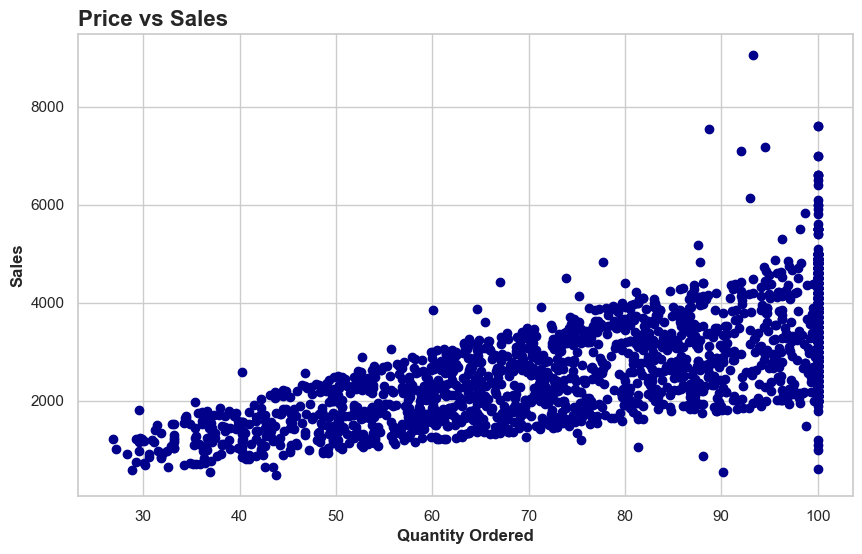

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(customersegm_clean['priceeach'], customersegm_clean['sales'], c="darkblue")

plt.title('Price vs Sales', fontsize=16, weight='bold', loc='left')
plt.xlabel('Quantity Ordered',weight='bold')
plt.ylabel('Sales',weight='bold')
plt.show()

#

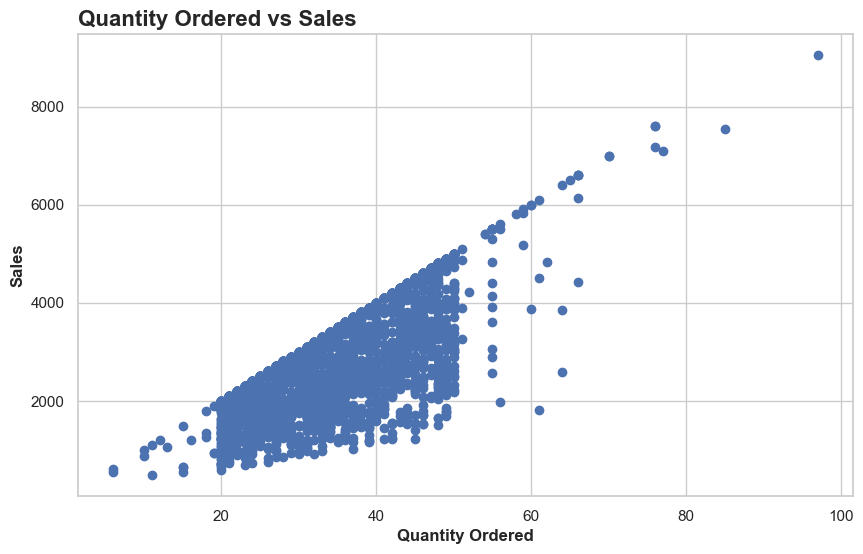

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(customersegm_clean['quantityordered'], customersegm_clean['sales'])

plt.title('Quantity Ordered vs Sales', fontsize=16, weight='bold', loc='left')
plt.xlabel('Quantity Ordered',weight='bold')
plt.ylabel('Sales',weight='bold')
plt.show()

#

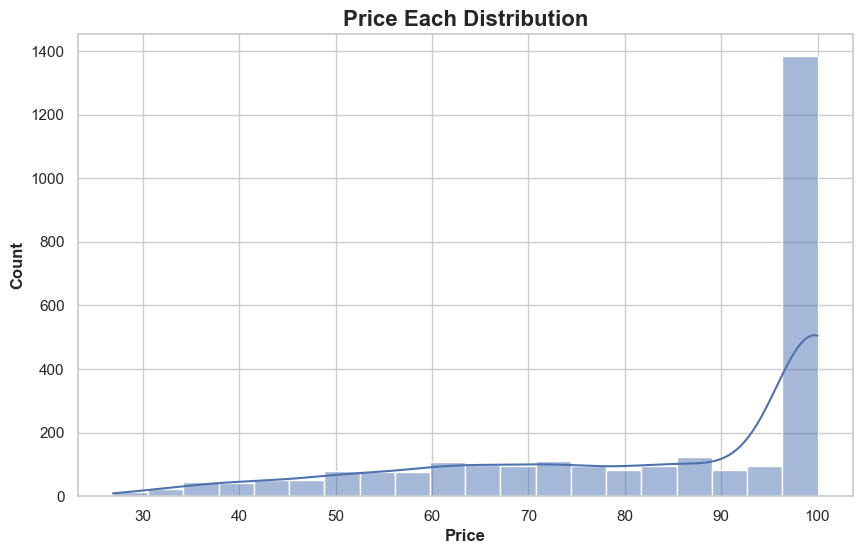

In [54]:
# Distribution plot for 'priceeach'
plt.figure(figsize=(10, 6))
sns.histplot(customersegm_clean['priceeach'], bins=20, kde=True)
plt.title('Price Each Distribution', fontsize=16, weight='bold')
plt.xlabel("Price", weight='bold')
plt.ylabel("Count", weight='bold')
plt.show()

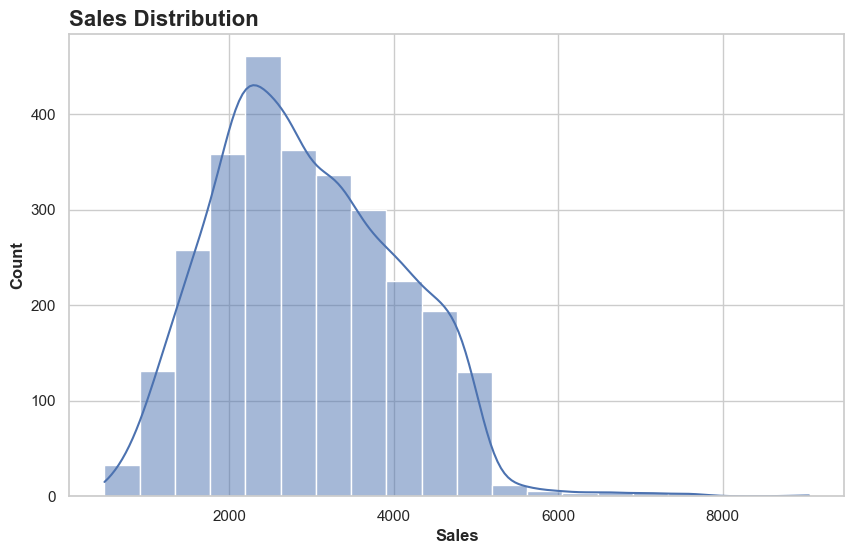

In [55]:
# Distribution plot for 'sales'
plt.figure(figsize=(10, 6))
sns.histplot(customersegm_clean['sales'], bins=20, kde=True)
plt.title('Sales Distribution', fontsize=16, weight='bold', loc='left')
plt.xlabel("Sales", weight='bold')
plt.ylabel("Count", weight='bold')
plt.show()

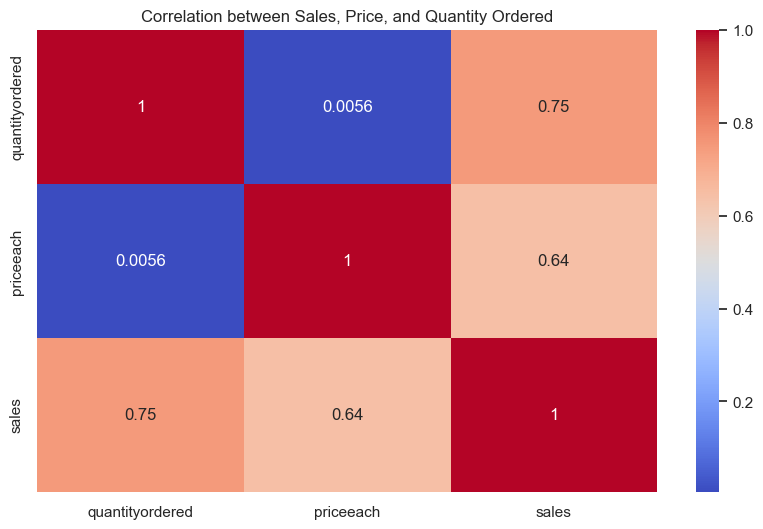

In [56]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customersegm_clean[['quantityordered', 'priceeach', 'sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sales, Price, and Quantity Ordered')
plt.show()


In [57]:
customersegm_clean=customersegm_clean.to_csv('customersegm_clean.csv')